# Description of Data

In [1]:
import pandas as pd
import numpy as np
Transaction_ID=pd.read_csv('Transaction_ID.csv')
City=pd.read_csv('City.csv')
Customer_ID=pd.read_csv('Customer_ID.csv')
Cab_data=pd.read_csv('Cab_Data.csv')

In [2]:
Transaction_ID.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [3]:
Transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [4]:
Transaction_ID.shape

(440098, 3)

In [5]:
Transaction_ID.isnull().any(axis=0)


Transaction ID    False
Customer ID       False
Payment_Mode      False
dtype: bool

In [6]:
City.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [7]:
City.shape

(20, 3)

In [8]:
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [9]:
City.isnull().any(axis=0)


City          False
Population    False
Users         False
dtype: bool

In [10]:
Customer_ID.head()


Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [11]:
Customer_ID.shape

(49171, 4)

In [12]:
Customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
Customer_ID.isnull().any(axis=0)


Customer ID           False
Gender                False
Age                   False
Income (USD/Month)    False
dtype: bool

In [14]:
Cab_data.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [15]:
Cab_data.shape

(359392, 7)

In [16]:
Cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [17]:
Cab_data.isnull().any(axis=0)


Transaction ID    False
Date of Travel    False
Company           False
City              False
KM Travelled      False
Price Charged     False
Cost of Trip      False
dtype: bool

# Preparing the Master DataSet

In [18]:
master_data = pd.merge(Cab_data, Transaction_ID, on='Transaction ID', how='inner')
master_data = pd.merge(master_data, Customer_ID, on='Customer ID', how='inner')
master_data = pd.merge(master_data, City, on='City', how='left')


In [19]:
master_data.rename(columns={'Price Charged': 'Price_Charged'}, inplace=True)

In [20]:
master_data.head()

Transaction ID  Date of Travel     Company        City  KM Travelled  \
0        10000011           42377    Pink Cab  ATLANTA GA         30.45   
1        10351127           43302  Yellow Cab  ATLANTA GA         26.19   
2        10412921           43427  Yellow Cab  ATLANTA GA         42.55   
3        10000012           42375    Pink Cab  ATLANTA GA         28.62   
4        10320494           43211  Yellow Cab  ATLANTA GA         36.38   

   Price_Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         370.95      313.6350        29290         Card   Male   28   
1         598.70      317.4228        29290         Cash   Male   28   
2         792.05      597.4020        29290         Card   Male   28   
3         358.52      334.8540        27703         Card   Male   27   
4         721.10      467.1192        27703         Card   Male   27   

   Income (USD/Month) Population     Users  
0               10813   814,885    24,701   
1               10813   814,885    24,701   
2               10813   814,885    24,701   
3                9237   814,885    24,701   
4                9237   814,885    24,701

In [21]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price_Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


In [22]:
master_data.shape

(359392, 14)

In [23]:
master_data.isnull().any(axis=0)


Transaction ID        False
Date of Travel        False
Company               False
City                  False
KM Travelled          False
Price_Charged         False
Cost of Trip          False
Customer ID           False
Payment_Mode          False
Gender                False
Age                   False
Income (USD/Month)    False
Population            False
Users                 False
dtype: bool

# Data Imputation

In [24]:
from datetime import datetime, timedelta

def to_date_format(serial_date):
    if pd.isnull(serial_date):
        return None
    else:
        excel_epoch = datetime(1899, 12, 30)
        delta = timedelta(days=serial_date)
        return excel_epoch + delta


In [25]:
master_data['Date of Travel'] = master_data['Date of Travel'].apply(lambda x: to_date_format(x))


In [26]:
master_data.head()

Transaction ID Date of Travel     Company        City  KM Travelled  \
0        10000011     2016-01-08    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-21  Yellow Cab  ATLANTA GA         26.19   
2        10412921     2018-11-23  Yellow Cab  ATLANTA GA         42.55   
3        10000012     2016-01-06    Pink Cab  ATLANTA GA         28.62   
4        10320494     2018-04-21  Yellow Cab  ATLANTA GA         36.38   

   Price_Charged  Cost of Trip  Customer ID Payment_Mode Gender  Age  \
0         370.95      313.6350        29290         Card   Male   28   
1         598.70      317.4228        29290         Cash   Male   28   
2         792.05      597.4020        29290         Card   Male   28   
3         358.52      334.8540        27703         Card   Male   27   
4         721.10      467.1192        27703         Card   Male   27   

   Income (USD/Month) Population     Users  
0               10813   814,885    24,701   
1               10813   814,885    24,701   
2               10813   814,885    24,701   
3                9237   814,885    24,701   
4                9237   814,885    24,701

In [27]:
master_data.rename(columns={"Transaction ID": "Transaction_id","KM Travelled":"KM_Travelled",
                            "Cost of Trip":"Cost_of_Trip","Customer ID":"Customer_ID",
                            "Date of Travel":"Date_of_Travel"}, inplace=True)

master_data

Transaction_id Date_of_Travel     Company            City  \
0             10000011     2016-01-08    Pink Cab      ATLANTA GA   
1             10351127     2018-07-21  Yellow Cab      ATLANTA GA   
2             10412921     2018-11-23  Yellow Cab      ATLANTA GA   
3             10000012     2016-01-06    Pink Cab      ATLANTA GA   
4             10320494     2018-04-21  Yellow Cab      ATLANTA GA   
...                ...            ...         ...             ...   
359387        10439790     2018-01-07  Yellow Cab      SEATTLE WA   
359388        10439799     2018-01-03  Yellow Cab  SILICON VALLEY   
359389        10439838     2018-01-04  Yellow Cab       TUCSON AZ   
359390        10439840     2018-01-06  Yellow Cab       TUCSON AZ   
359391        10439846     2018-01-04  Yellow Cab       TUCSON AZ   

        KM_Travelled  Price_Charged  Cost_of_Trip  Customer_ID Payment_Mode  \
0              30.45         370.95      313.6350        29290         Card   
1              26.19         598.70      317.4228        29290         Cash   
2              42.55         792.05      597.4020        29290         Card   
3              28.62         358.52      334.8540        27703         Card   
4              36.38         721.10      467.1192        27703         Card   
...              ...            ...           ...          ...          ...   
359387         16.66         261.18      213.9144        38520         Card   
359388         13.72         277.97      172.8720        12490         Cash   
359389         19.00         303.77      232.5600        41414         Card   
359390          5.60          92.42       70.5600        41677         Cash   
359391         13.30         244.65      180.3480        39761         Card   

        Gender  Age  Income (USD/Month)   Population     Users  
0         Male   28               10813     814,885    24,701   
1         Male   28               10813     814,885    24,701   
2         Male   28               10813     814,885    24,701   
3         Male   27                9237     814,885    24,701   
4         Male   27                9237     814,885    24,701   
...        ...  ...                 ...          ...       ...  
359387  Female   42               19417     671,238    25,063   
359388    Male   33               18713   1,177,609    27,247   
359389    Male   38                3960     631,442     5,712   
359390    Male   23               19454     631,442     5,712   
359391  Female   32               10128     631,442     5,712   

[359392 rows x 14 columns]

In [28]:
months=[]
years =[]
for i in range(len(master_data['Date_of_Travel'])):
    months.append(master_data['Date_of_Travel'][i].month)
    years.append(master_data['Date_of_Travel'][i].year)
master_data['Month'] = months
master_data['Year'] = years

master_data.drop('Date_of_Travel', axis=1, inplace=True)

# Analysing Each Company

In [29]:
PinkCab = master_data[master_data['Company']=='Pink Cab']

In [30]:
YellowCab = master_data[master_data['Company']=='Yellow Cab']

In [31]:
Plot_Pink = master_data[master_data.Company=='Pink Cab'].groupby(['Month']).Transaction_id.count()

In [32]:
Plot_Pink

Month
1      5057
2      3375
3      4223
4      4083
5      4960
6      5877
7      6590
8      7739
9      9658
10    10576
11    11005
12    11568
Name: Transaction_id, dtype: int64

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly Transaction Analysis

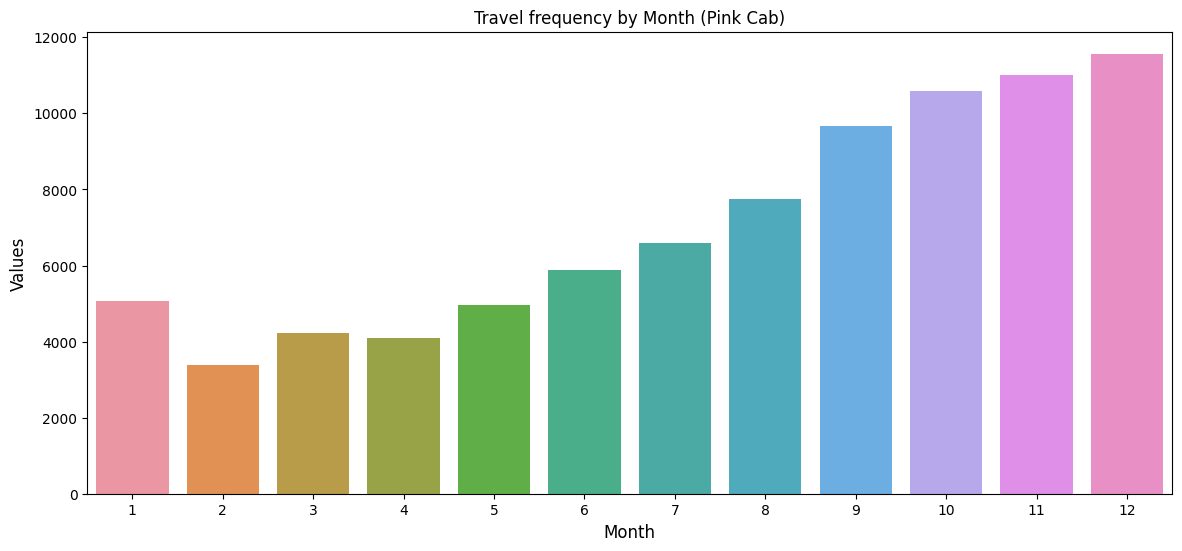

In [34]:
plt.figure(figsize=(14,6))
sns.barplot(x=Plot_Pink.index,y=Plot_Pink.values)
plt.title('Travel frequency by Month (Pink Cab)',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.show()

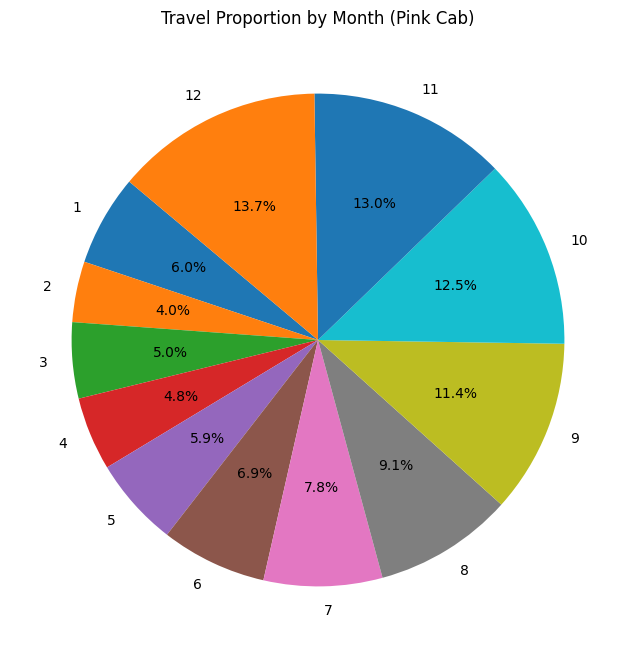

In [35]:
plt.figure(figsize=(8, 8))
plt.pie(Plot_Pink.values, labels=Plot_Pink.index, autopct='%1.1f%%', startangle=140)
plt.title('Travel Proportion by Month (Pink Cab)', fontsize=12)
plt.show()


In [36]:
Plot_Yellow = master_data[master_data.Company=='Yellow Cab'].groupby(['Month']).Transaction_id.count()

In [37]:
Plot_Yellow

Month
1     18117
2     14932
3     17423
4     17351
5     18741
6     18836
7     21086
8     23584
9     27201
10    30276
11    31695
12    35439
Name: Transaction_id, dtype: int64

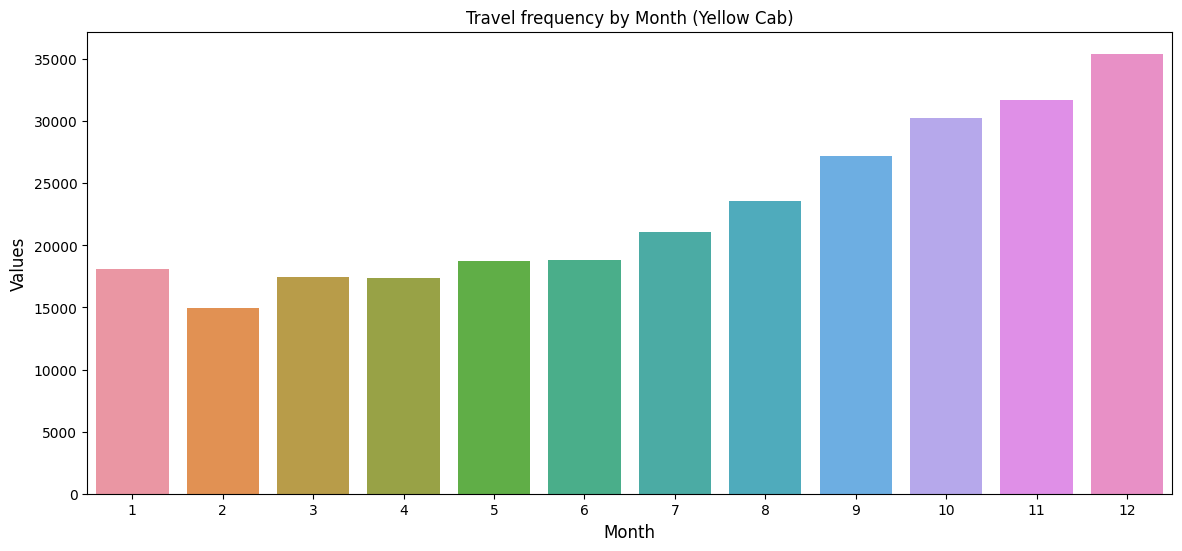

In [38]:
plt.figure(figsize=(14,6))
sns.barplot(x=Plot_Yellow.index,y=Plot_Yellow.values)
plt.title('Travel frequency by Month (Yellow Cab)',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.show()

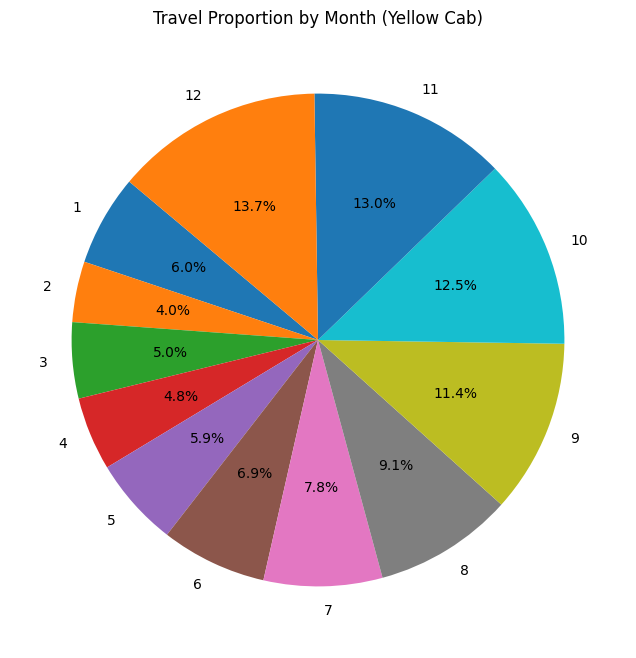

In [39]:
plt.figure(figsize=(8, 8))
plt.pie(Plot_Pink.values, labels=Plot_Pink.index, autopct='%1.1f%%', startangle=140)
plt.title('Travel Proportion by Month (Yellow Cab)', fontsize=12)
plt.show()


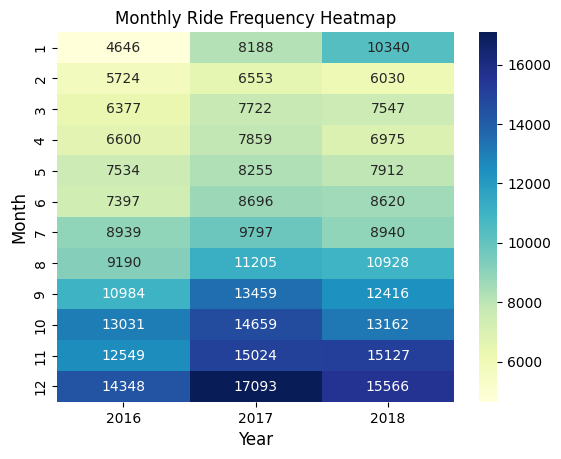

In [40]:
# For the heatmap, you would need to create a pivot table with 'Month' as the rows, 'Year' as the columns, and 'Transaction_ID' as the values
heatmap_data = master_data.pivot_table(values='Transaction_id', index='Month', columns='Year', aggfunc='count')

sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Monthly Ride Frequency Heatmap', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.show()


In [41]:
master_data.head()

Transaction_id     Company        City  KM_Travelled  Price_Charged  \
0        10000011    Pink Cab  ATLANTA GA         30.45         370.95   
1        10351127  Yellow Cab  ATLANTA GA         26.19         598.70   
2        10412921  Yellow Cab  ATLANTA GA         42.55         792.05   
3        10000012    Pink Cab  ATLANTA GA         28.62         358.52   
4        10320494  Yellow Cab  ATLANTA GA         36.38         721.10   

   Cost_of_Trip  Customer_ID Payment_Mode Gender  Age  Income (USD/Month)  \
0      313.6350        29290         Card   Male   28               10813   
1      317.4228        29290         Cash   Male   28               10813   
2      597.4020        29290         Card   Male   28               10813   
3      334.8540        27703         Card   Male   27                9237   
4      467.1192        27703         Card   Male   27                9237   

  Population     Users  Month  Year  
0   814,885    24,701       1  2016  
1   814,885    24,701       7  2018  
2   814,885    24,701      11  2018  
3   814,885    24,701       1  2016  
4   814,885    24,701       4  2018

In [42]:
overall_distance = master_data['KM_Travelled'].describe()

In [43]:
Pink_distance= PinkCab['KM_Travelled'].describe()

In [44]:
Yellow_distance = YellowCab['KM_Travelled'].describe()

In [45]:
df=pd.DataFrame(columns=['overall_distance', 'Pink_distance', 'Yellow_distance'])

In [46]:
df = pd.DataFrame({'Overall': overall_distance.values,
                  'PinkCab': Pink_distance.values,
                  'YellowCab': Yellow_distance.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
df


Overall       PinkCab      YellowCab
Count      359392.000000  84711.000000  274681.000000
Mean           22.567254     22.559917      22.569517
Std. Dev.      12.233526     12.231092      12.234298
Min             1.900000      1.900000       1.900000
25%            12.000000     12.000000      11.990000
50%            22.440000     22.440000      22.440000
75%            32.960000     32.960000      32.960000
Max            48.000000     48.000000      48.000000

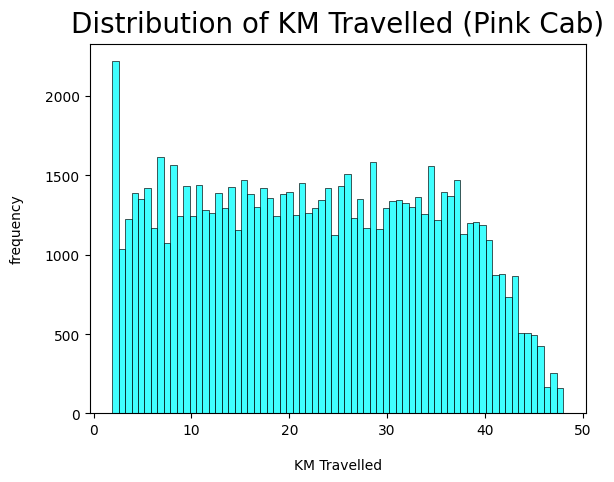

In [47]:
ax = sns.histplot(PinkCab['KM_Travelled'], kde=False, color='cyan', bins=70)
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()


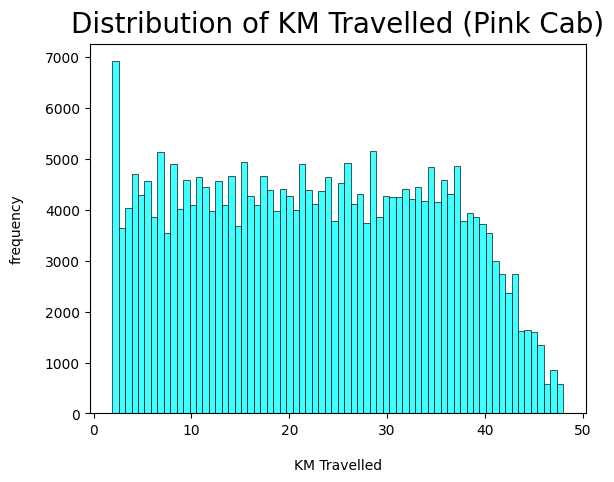

In [48]:
ax = sns.histplot(YellowCab['KM_Travelled'], kde=False, color='cyan', bins=70)
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()


In [49]:
PinkCab.head()


Transaction_id   Company        City  KM_Travelled  Price_Charged  \
0         10000011  Pink Cab  ATLANTA GA         30.45         370.95   
3         10000012  Pink Cab  ATLANTA GA         28.62         358.52   
6         10395626  Pink Cab  ATLANTA GA         13.39         167.03   
7         10000013  Pink Cab  ATLANTA GA          9.04         125.20   
11        10000014  Pink Cab  ATLANTA GA         33.17         377.40   

    Cost_of_Trip  Customer_ID Payment_Mode Gender  Age  Income (USD/Month)  \
0        313.635        29290         Card   Male   28               10813   
3        334.854        27703         Card   Male   27                9237   
6        141.934        27703         Card   Male   27                9237   
7         97.632        28712         Cash   Male   53               11242   
11       351.602        28020         Cash   Male   23               23327   

   Population     Users  Month  Year  
0    814,885    24,701       1  2016  
3    814,885    24,701       1  2016  
6    814,885    24,701      10  2018  
7    814,885    24,701       1  2016  
11   814,885    24,701       1  2016

In [50]:
YellowCab.head()

Transaction_id     Company        City  KM_Travelled  Price_Charged  \
1        10351127  Yellow Cab  ATLANTA GA         26.19         598.70   
2        10412921  Yellow Cab  ATLANTA GA         42.55         792.05   
4        10320494  Yellow Cab  ATLANTA GA         36.38         721.10   
5        10324737  Yellow Cab  ATLANTA GA          6.18         138.40   
8        10079404  Yellow Cab  ATLANTA GA         39.60         704.30   

   Cost_of_Trip  Customer_ID Payment_Mode Gender  Age  Income (USD/Month)  \
1      317.4228        29290         Cash   Male   28               10813   
2      597.4020        29290         Card   Male   28               10813   
4      467.1192        27703         Card   Male   27                9237   
5       87.5088        27703         Cash   Male   27                9237   
8      494.2080        28712         Card   Male   53               11242   

  Population     Users  Month  Year  
1   814,885    24,701       7  2018  
2   814,885    24,701      11  2018  
4   814,885    24,701       4  2018  
5   814,885    24,701       5  2018  
8   814,885    24,701       9  2016

In [51]:
YellowCab.rename(columns={'Price Charged': 'Price_Charged'}, inplace=True)

C:\Users\sanja\AppData\Local\Temp\ipykernel_8972\1256623217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YellowCab.rename(columns={'Price Charged': 'Price_Charged'}, inplace=True)


In [52]:
PinkCab.rename(columns={'Price Charged': 'Price_Charged'}, inplace=True)

C:\Users\sanja\AppData\Local\Temp\ipykernel_8972\486023343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PinkCab.rename(columns={'Price Charged': 'Price_Charged'}, inplace=True)


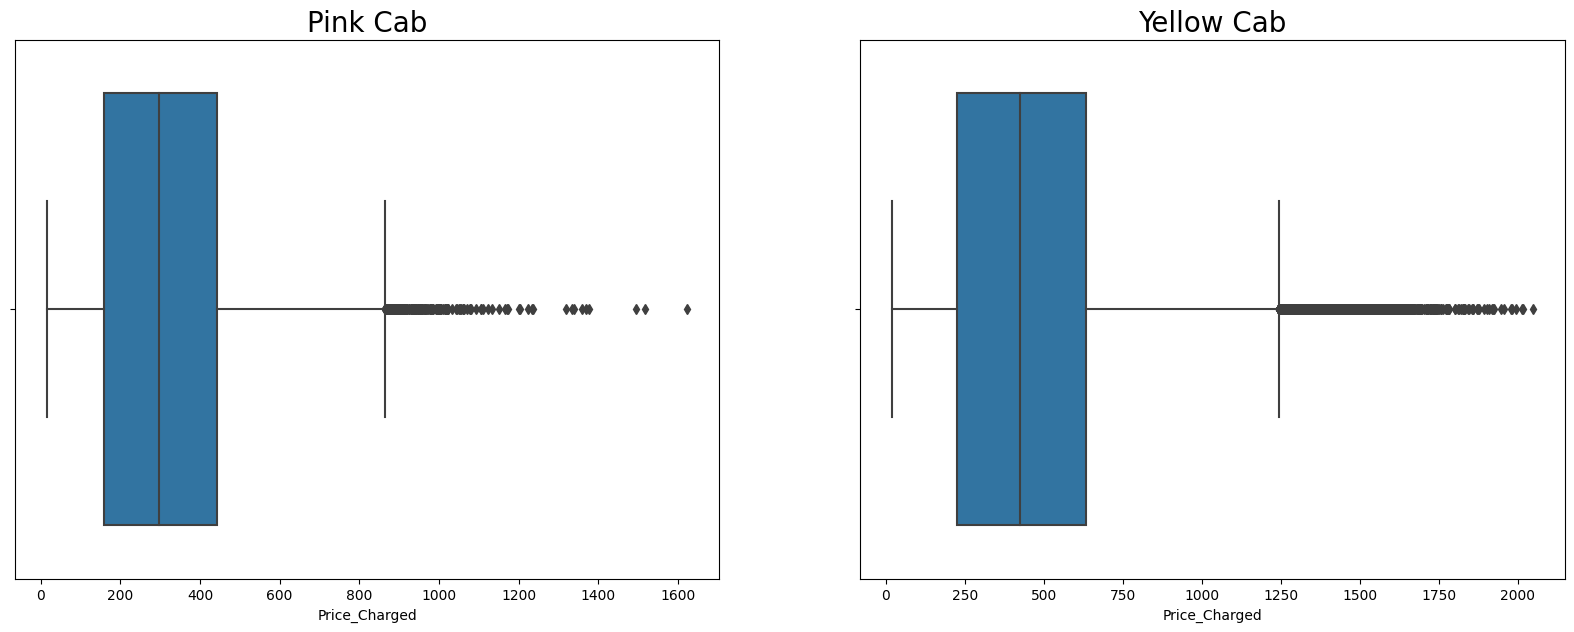

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))

# Assuming 'Price_Charged' is a column in your PinkCab DataFrame.
sns.boxplot(data=PinkCab, x='Price_Charged', ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)

# Assuming 'Price_Charged' is a column in your YellowCab DataFrame.
sns.boxplot(data=YellowCab, x='Price_Charged', ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)

plt.show()


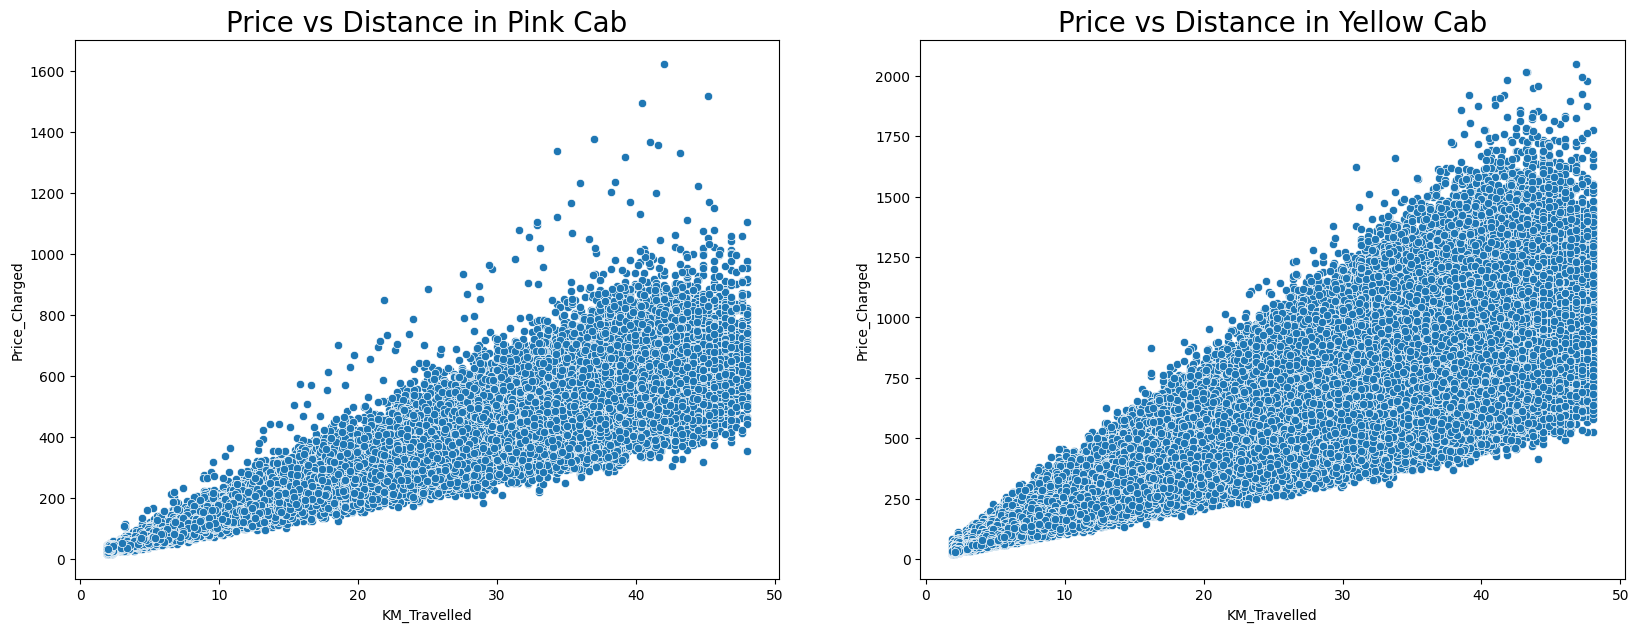

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))

sns.scatterplot(x=PinkCab['KM_Travelled'], y=PinkCab['Price_Charged'], ax=ax1)
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
# The line below might cause an error since ax1.get_xticklabels() is not valid for scatter plots
# ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)

sns.scatterplot(x=YellowCab['KM_Travelled'], y=YellowCab['Price_Charged'], ax=ax2)
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
# Similarly, update the x-tick labels setting for scatter plots if needed

plt.show()


In [55]:
PinkCab['KM_Travelled'].corr(PinkCab['Price_Charged'])

0.9277652782594882

In [56]:
YellowCab['KM_Travelled'].corr(YellowCab['Price_Charged'])

0.8597086294478486

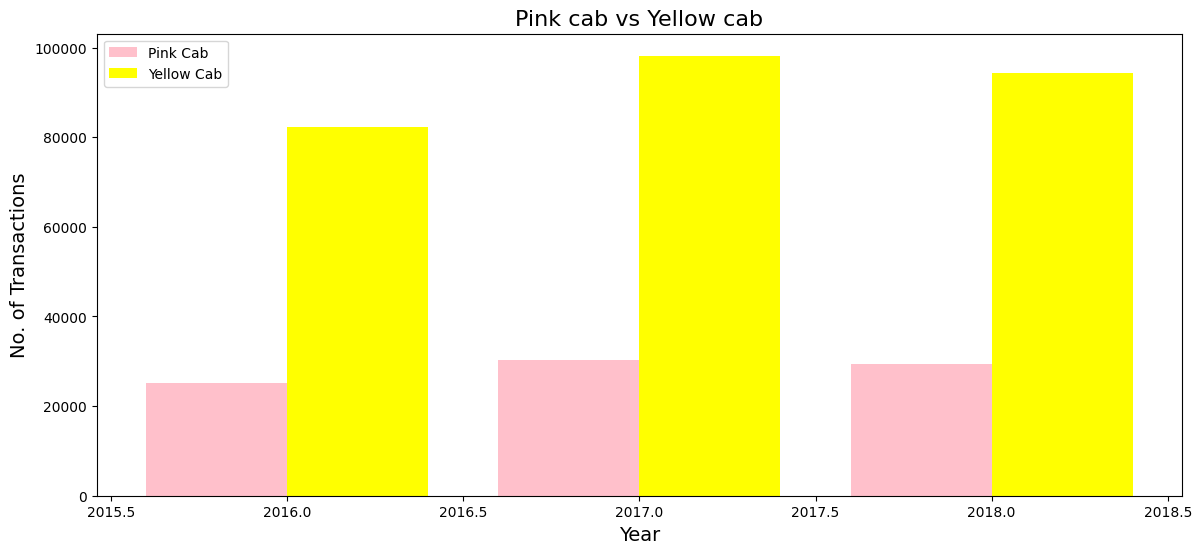

In [57]:
plot1 = master_data[master_data.Company=='Pink Cab'].groupby('Year').Transaction_id.count()
plot2 = master_data[master_data.Company=='Yellow Cab'].groupby('Year').Transaction_id.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title("Pink cab vs Yellow cab",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

In [ ]:
Despite of costs being high the no. of transactions for the yellow cab are higher then pink on yearly basis

In [58]:
#master_data[master_data.Company=='Pink Cab'].groupby('Year')[Price_Charged].mean()
mean_price_per_year = master_data[master_data['Company'] == 'Pink Cab'].groupby('Year')['Price_Charged'].mean()
print(mean_price_per_year)

Year
2016    315.330113
2017    315.907442
2018    301.642530
Name: Price_Charged, dtype: float64


In [59]:
mean_price_per_year = master_data[master_data['Company'] == 'Yellow Cab'].groupby('Year')['Price_Charged'].mean()
print(mean_price_per_year)

Year
2016    467.918301
2017    466.639950
2018    440.875558
Name: Price_Charged, dtype: float64


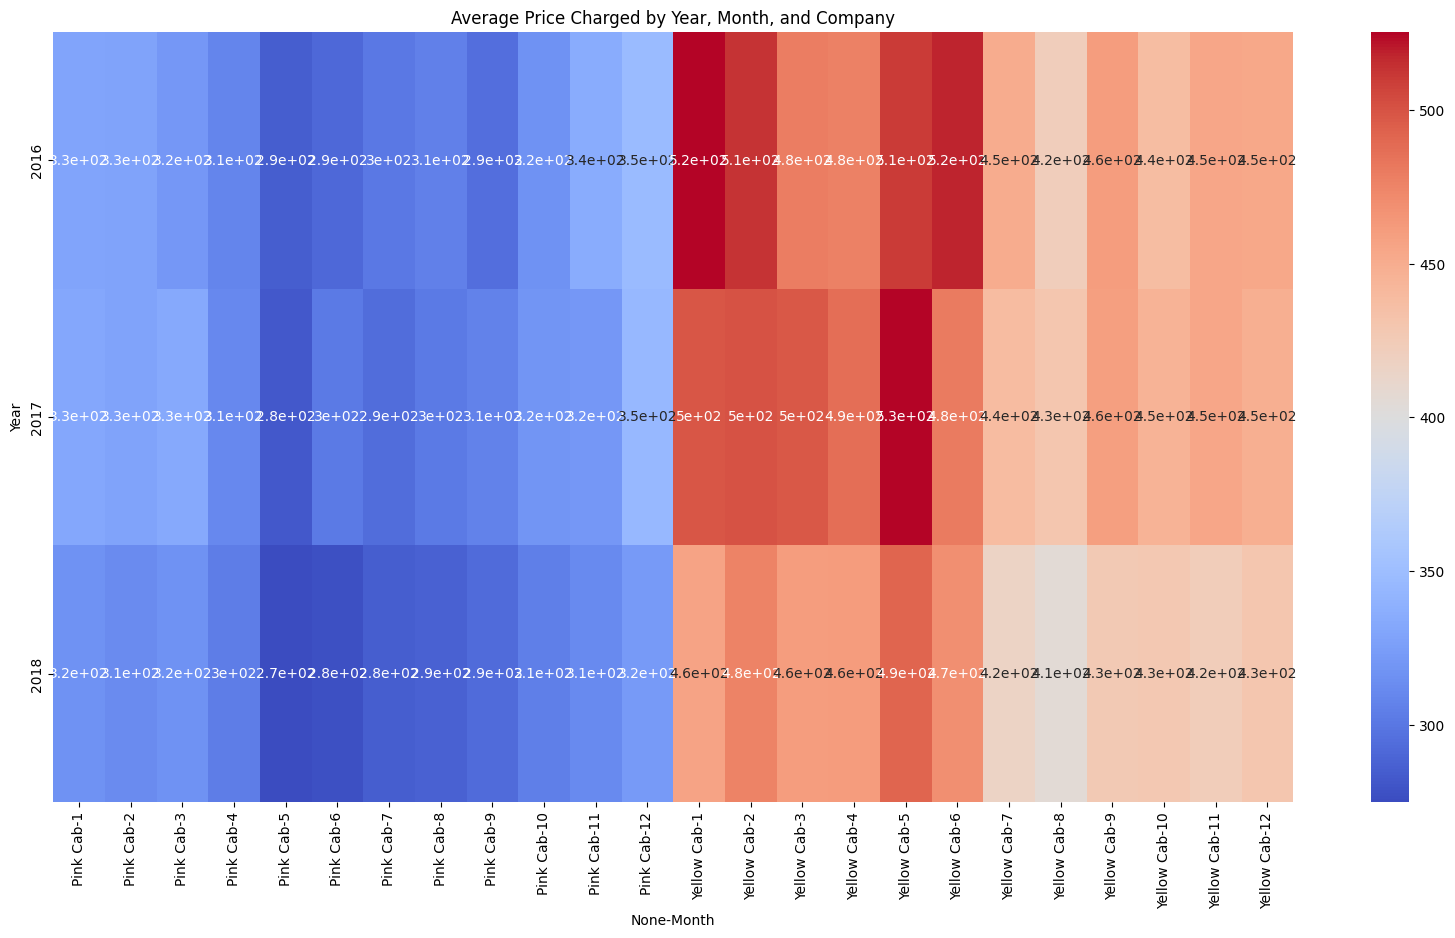

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Create pivot tables for each company
pivot_pink = master_data[master_data['Company'] == 'Pink Cab'].pivot_table(values='Price_Charged', index='Year', columns='Month', aggfunc='mean')
pivot_yellow = master_data[master_data['Company'] == 'Yellow Cab'].pivot_table(values='Price_Charged', index='Year', columns='Month', aggfunc='mean')

# Combine the pivot tables
pivot_combined = pd.concat([pivot_pink, pivot_yellow], axis=1, keys=['Pink Cab', 'Yellow Cab'])

# Generate the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_combined, annot=True, cmap='coolwarm')
plt.title('Average Price Charged by Year, Month, and Company')
plt.show()


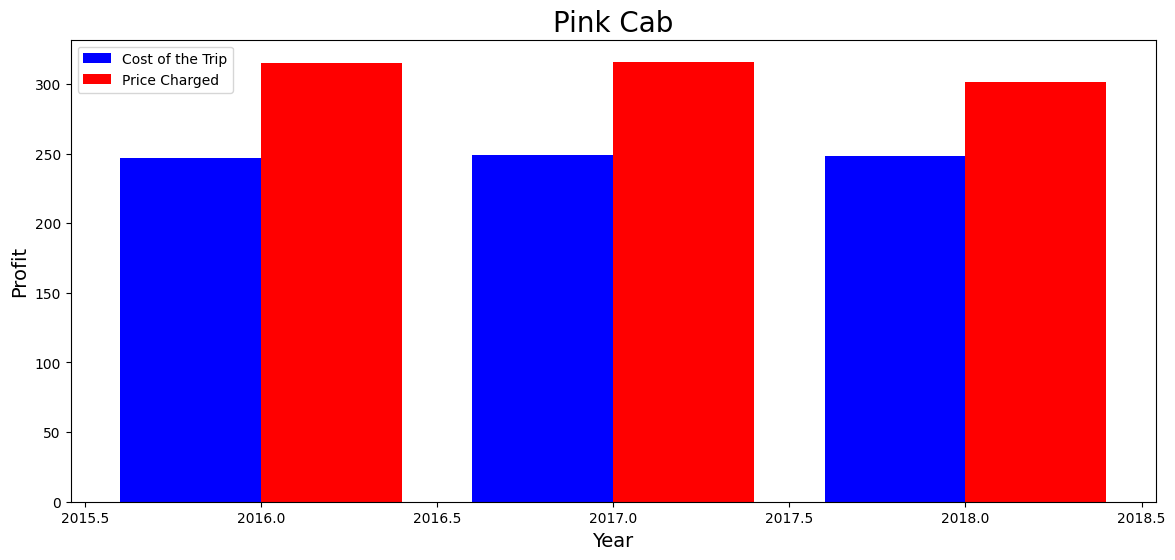

In [61]:
plot1 =master_data[master_data.Company=='Pink Cab'].groupby('Year').Transaction_id.count()
plot3 = master_data[master_data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
plot4 = master_data[master_data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='blue', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='red', align='center',label='Price Charged')
plt.ylabel('Profit',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Pink Cab', fontsize=20)
plt.legend()
plt.show()

In [62]:
master_data[master_data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()


Year
2016    467.918301
2017    466.639950
2018    440.875558
Name: Price_Charged, dtype: float64

In [63]:
master_data[master_data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()


Year
2016    298.570481
2017    297.822893
2018    297.459436
Name: Cost_of_Trip, dtype: float64

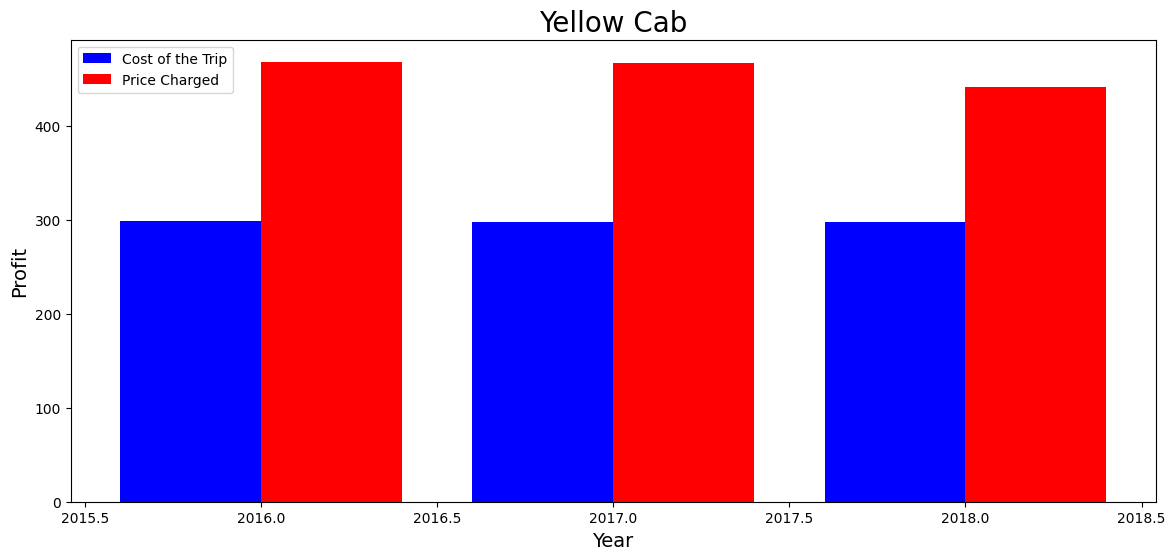

In [64]:
plot1 = master_data[master_data.Company=='Yellow Cab'].groupby('Year').Transaction_id.count()
plot3 = master_data[master_data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
plot4 = master_data[master_data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='blue', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='red', align='center',label='Price Charged')
plt.ylabel('Profit', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Yellow Cab', fontsize=20)
plt.legend()
plt.show()

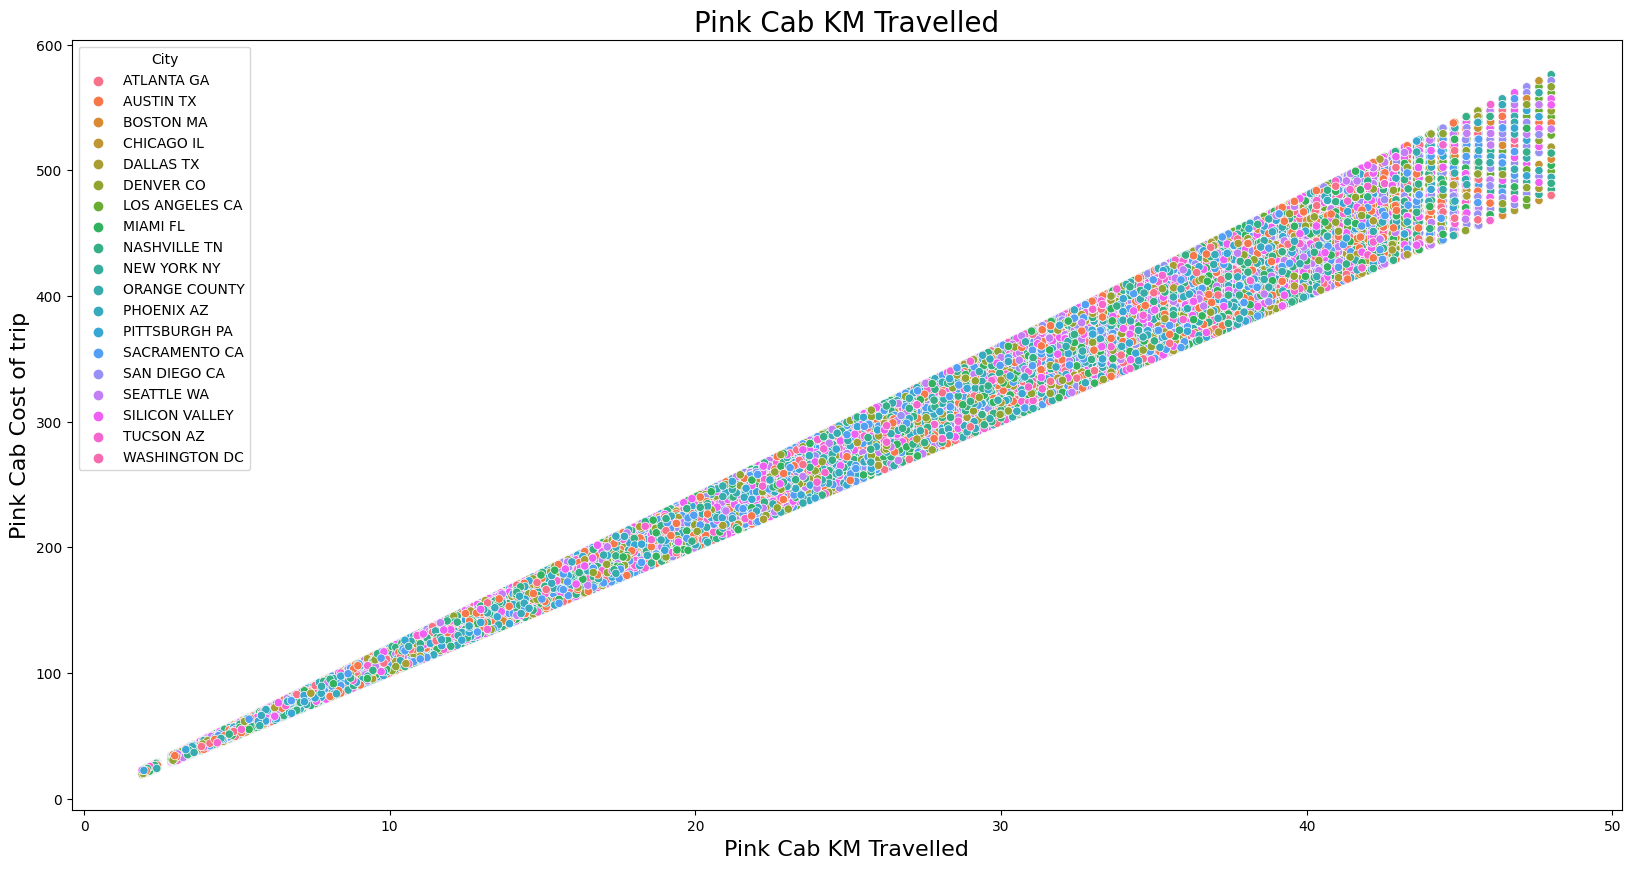

In [65]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=master_data, x=PinkCab["KM_Travelled"], y=PinkCab['Cost_of_Trip'], hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Cost of trip',fontsize = 16)
plt.xlabel('Pink Cab KM Travelled',fontsize = 16)
plt.show()

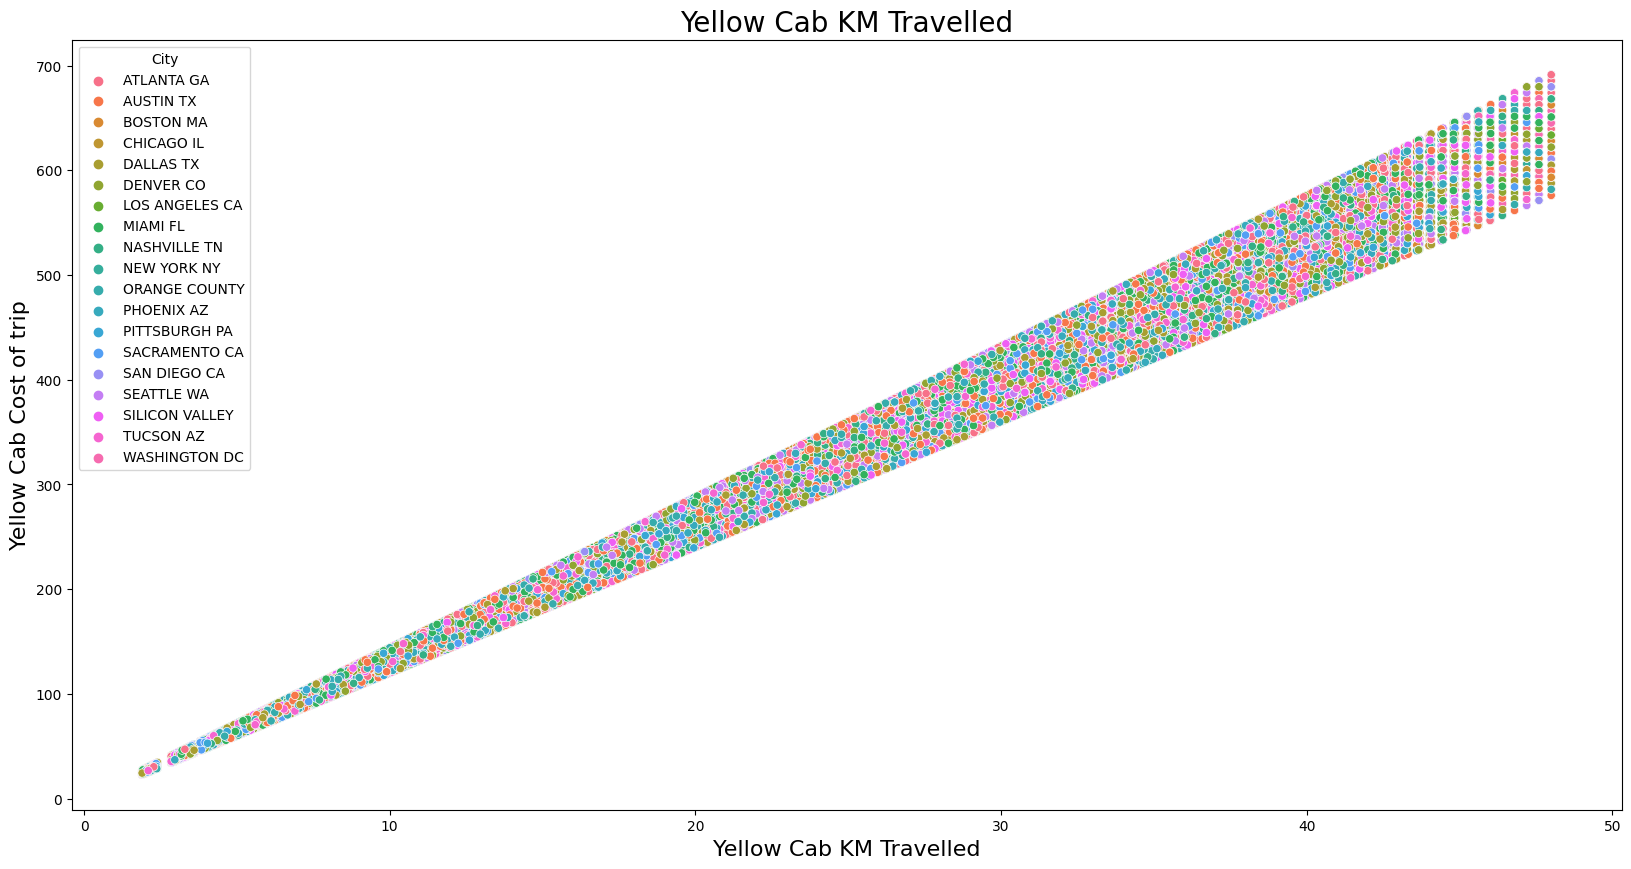

In [66]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=master_data, x=YellowCab["KM_Travelled"], y=YellowCab['Cost_of_Trip'], hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Cost of trip',fontsize = 16)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 16)
plt.show()

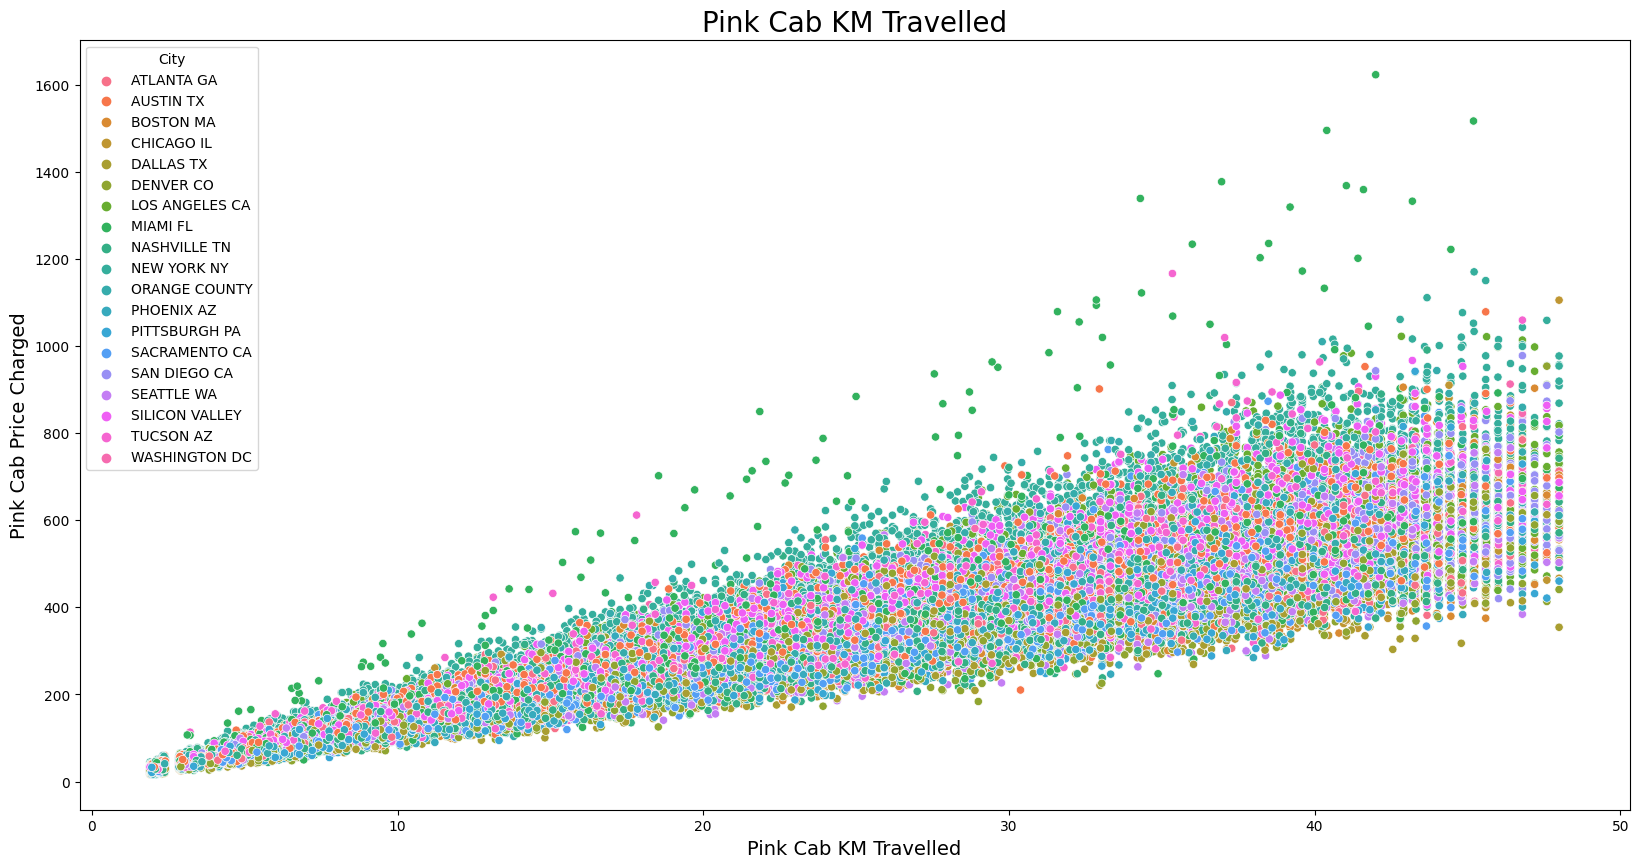

In [67]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=master_data, x=PinkCab["KM_Travelled"], y=PinkCab['Price_Charged'], hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Price Charged',fontsize = 14)
plt.xlabel('Pink Cab KM Travelled',fontsize = 14)
plt.show()

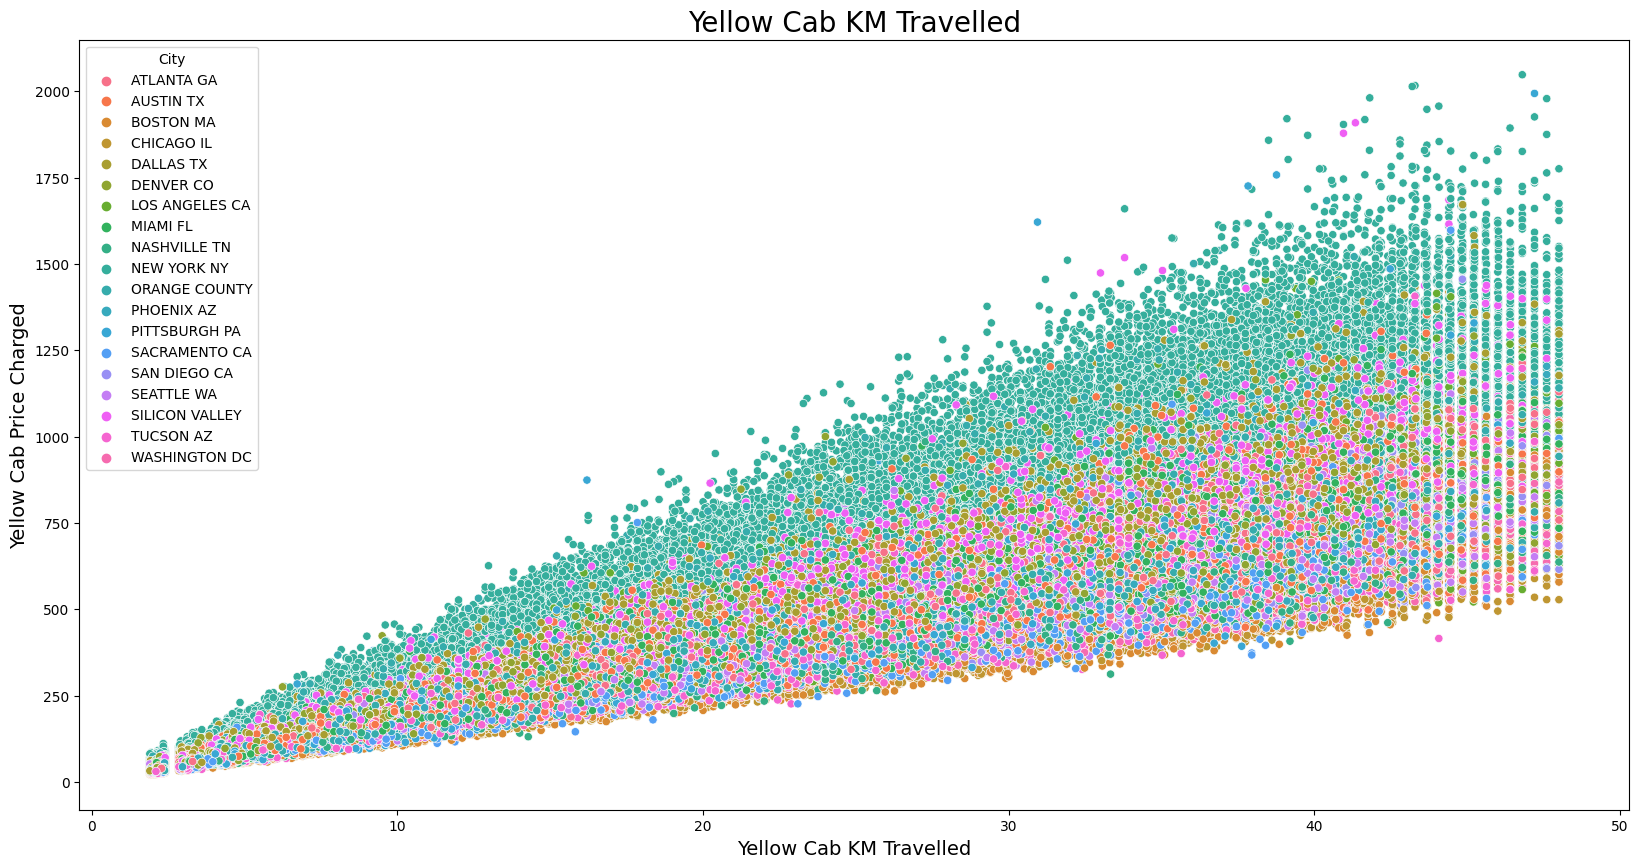

In [68]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=master_data, x=YellowCab["KM_Travelled"], y=YellowCab['Price_Charged'], hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Price Charged',fontsize = 14)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 14)
plt.show()

In [69]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction_id      359392 non-null  int64  
 1   Company             359392 non-null  object 
 2   City                359392 non-null  object 
 3   KM_Travelled        359392 non-null  float64
 4   Price_Charged       359392 non-null  float64
 5   Cost_of_Trip        359392 non-null  float64
 6   Customer_ID         359392 non-null  int64  
 7   Payment_Mode        359392 non-null  object 
 8   Gender              359392 non-null  object 
 9   Age                 359392 non-null  int64  
 10  Income (USD/Month)  359392 non-null  int64  
 11  Population          359392 non-null  object 
 12  Users               359392 non-null  object 
 13  Month               359392 non-null  int64  
 14  Year                359392 non-null  int64  
dtypes: float64(3), int64(6), object(6)

In [70]:
master_data = master_data.reset_index()
master_data = master_data.rename(columns={'Income_(USD/Month)':'Income'})
city_users = master_data.groupby('City').Users.count()
city_users


City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

In [71]:
master_data = master_data.reset_index()
master_data = master_data.rename(columns={'Income_(USD/Month)':'Income'})
city_users = master_data.groupby('City').Users.count()
city_users

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

In [72]:
city_y = master_data[master_data.Company=='Yellow Cab'].groupby('City').Transaction_id.count()
city_y

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_id, dtype: int64

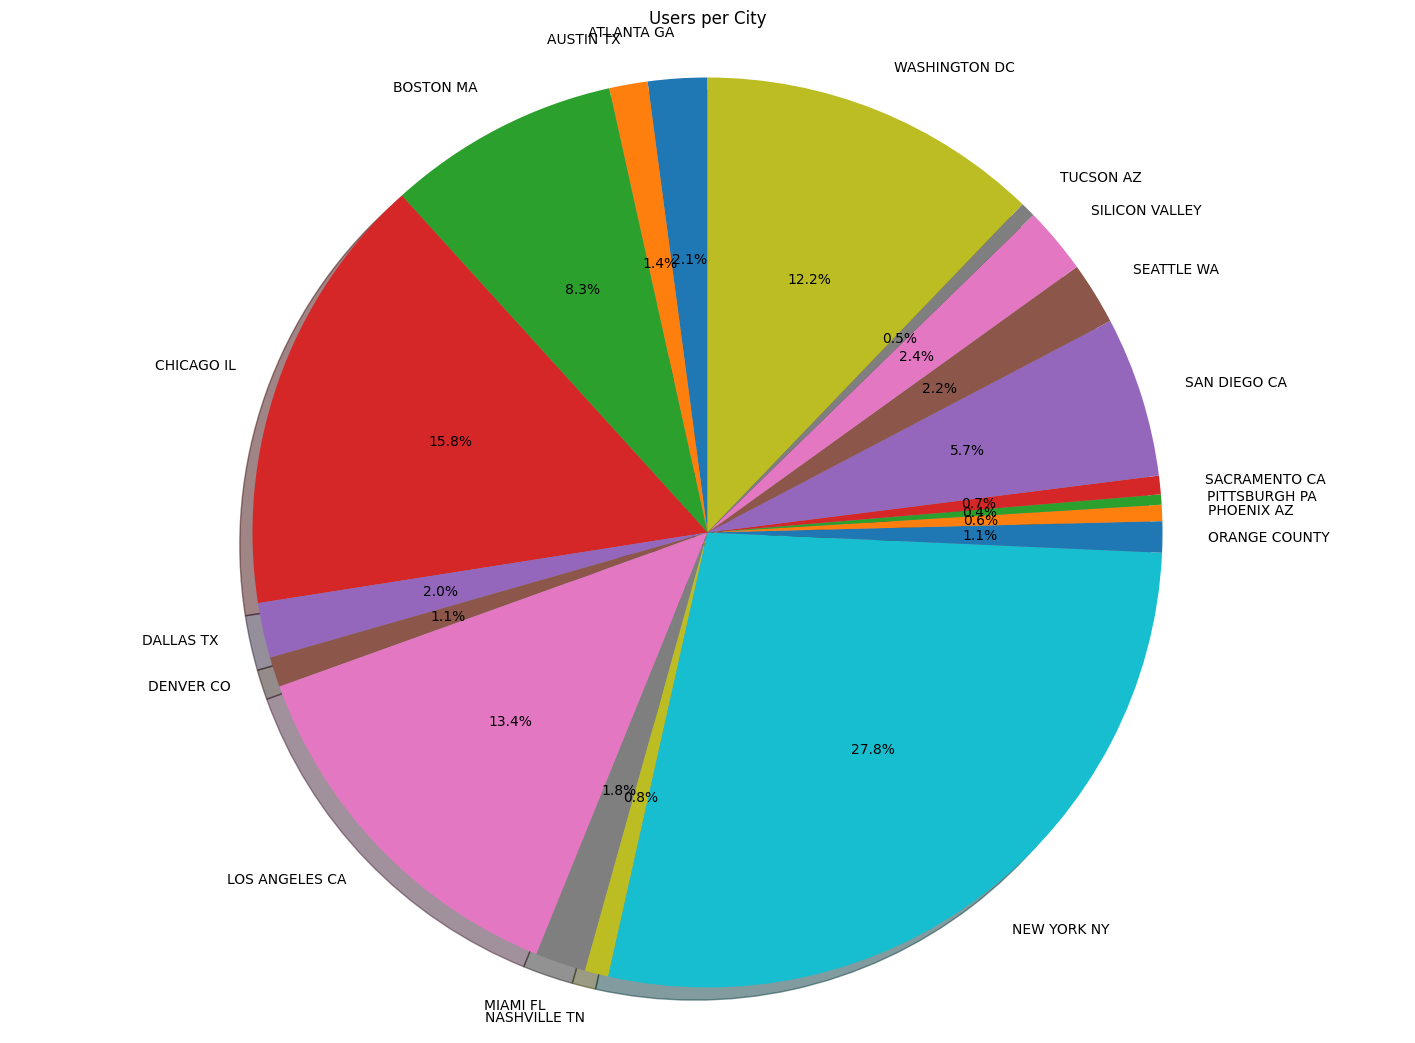

In [73]:
labs = city_users.index
vals = city_users.values
figp, axp = plt.subplots(figsize=(18,13))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

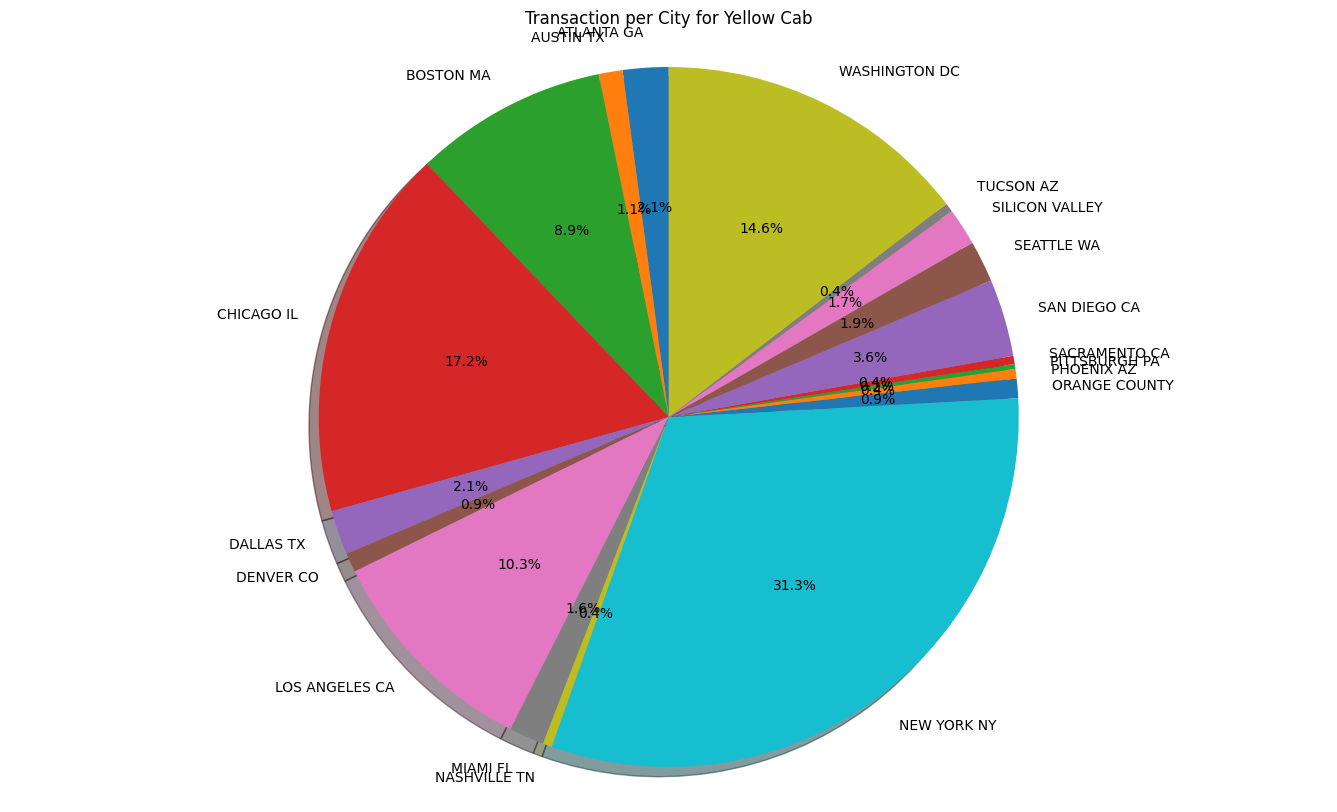

In [74]:
labs = city_y.index
vals = city_y.values
figp, axp = plt.subplots(figsize=(17,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Yellow Cab')
plt.show()

In [75]:
city_p = master_data[master_data.Company=='Pink Cab'].groupby('City').Transaction_id.count()
city_p

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_id, dtype: int64

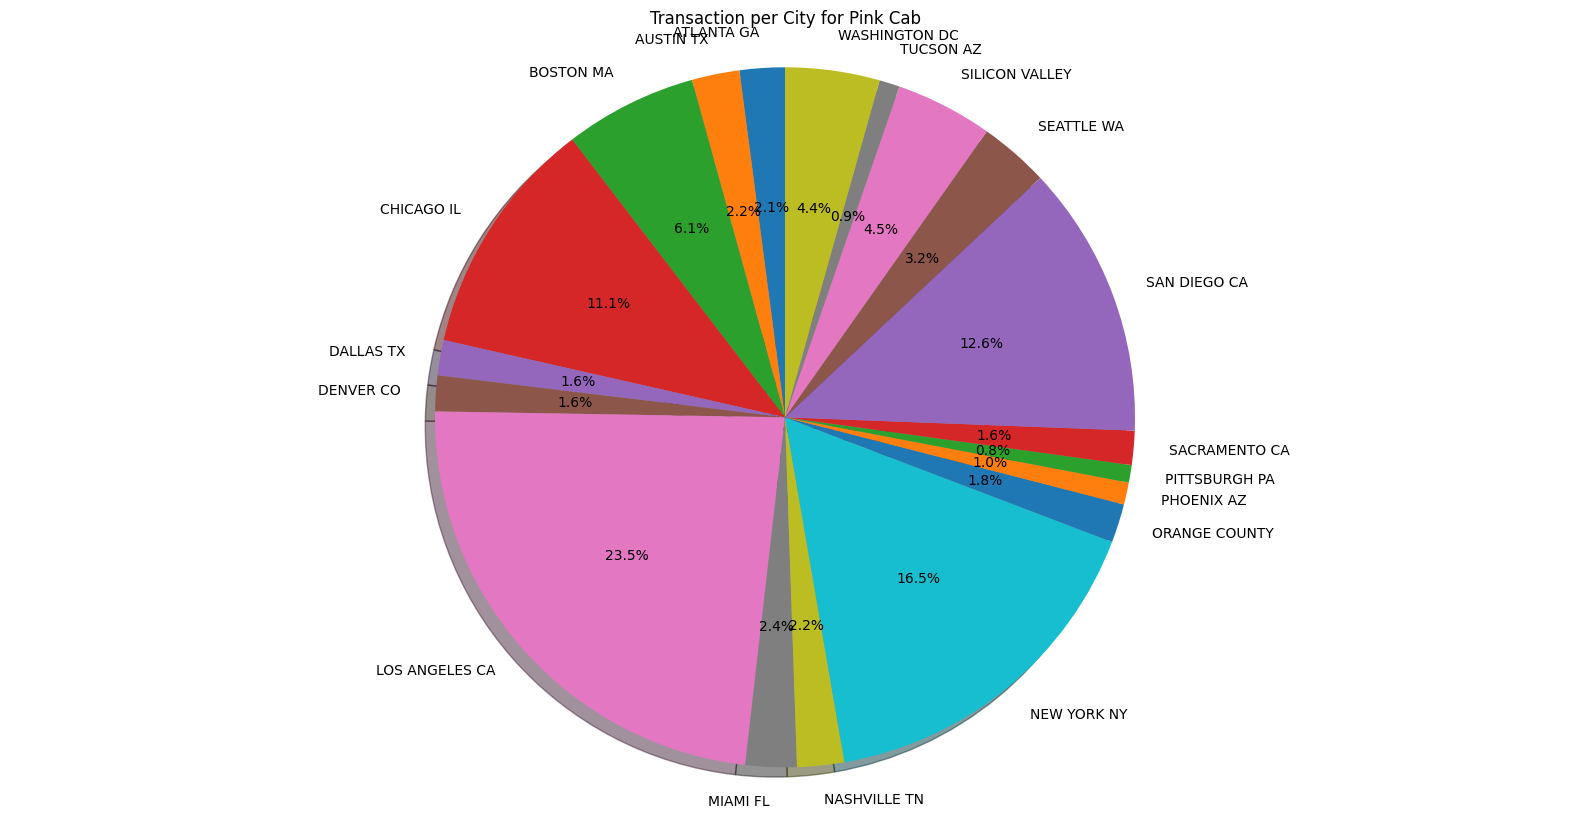

In [76]:
labs = city_p.index
vals = city_p.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Pink Cab')
plt.show()

In [77]:
gender_y=master_data[master_data.Company=='Yellow Cab'].groupby('Gender').Price_Charged.mean()
gender_y

Gender
Female    454.571538
Male      460.821326
Name: Price_Charged, dtype: float64

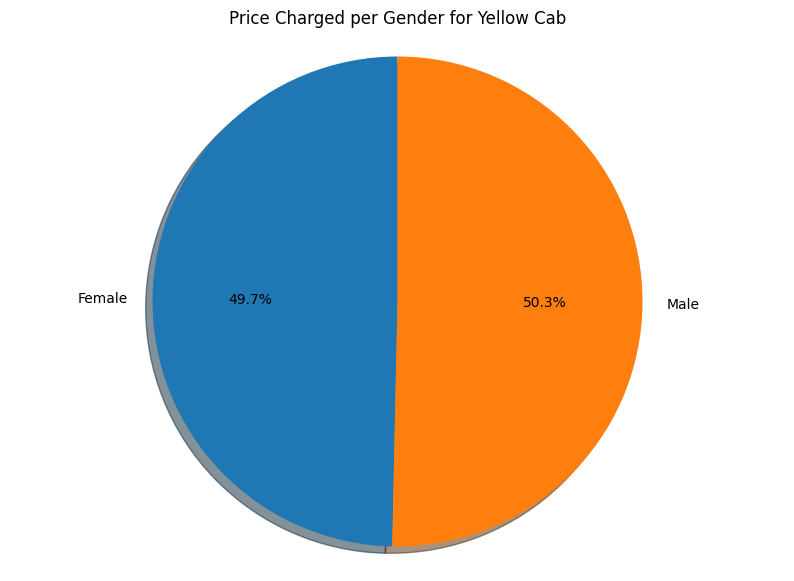

In [78]:
labs = gender_y.index
vals = gender_y.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Yellow Cab')
plt.show()

In [79]:
gender_p=master_data[master_data.Company=='Pink Cab'].groupby('Gender').Price_Charged.mean()
gender_p

Gender
Female    310.624823
Male      310.940547
Name: Price_Charged, dtype: float64

In [80]:
gender_cab=master_data.groupby(['Company','Gender']).Customer_ID.nunique()
gender_cab

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

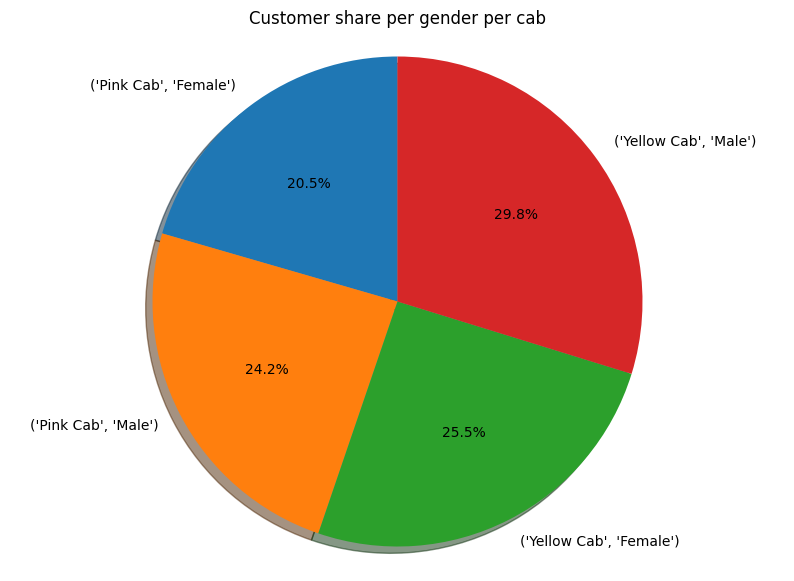

In [81]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab')
plt.show()

In [82]:
master_data['Margins'] = (master_data['Price_Charged']-master_data['Cost_of_Trip'])
master_data.head()

level_0  index  Transaction_id     Company        City  KM_Travelled  \
0        0      0        10000011    Pink Cab  ATLANTA GA         30.45   
1        1      1        10351127  Yellow Cab  ATLANTA GA         26.19   
2        2      2        10412921  Yellow Cab  ATLANTA GA         42.55   
3        3      3        10000012    Pink Cab  ATLANTA GA         28.62   
4        4      4        10320494  Yellow Cab  ATLANTA GA         36.38   

   Price_Charged  Cost_of_Trip  Customer_ID Payment_Mode Gender  Age  \
0         370.95      313.6350        29290         Card   Male   28   
1         598.70      317.4228        29290         Cash   Male   28   
2         792.05      597.4020        29290         Card   Male   28   
3         358.52      334.8540        27703         Card   Male   27   
4         721.10      467.1192        27703         Card   Male   27   

   Income (USD/Month) Population     Users  Month  Year   Margins  
0               10813   814,885    24,701       1  2016   57.3150  
1               10813   814,885    24,701       7  2018  281.2772  
2               10813   814,885    24,701      11  2018  194.6480  
3                9237   814,885    24,701       1  2016   23.6660  
4                9237   814,885    24,701       4  2018  253.9808

In [83]:
master_data.tail()

level_0   index  Transaction_id     Company            City  \
359387   359387  359387        10439790  Yellow Cab      SEATTLE WA   
359388   359388  359388        10439799  Yellow Cab  SILICON VALLEY   
359389   359389  359389        10439838  Yellow Cab       TUCSON AZ   
359390   359390  359390        10439840  Yellow Cab       TUCSON AZ   
359391   359391  359391        10439846  Yellow Cab       TUCSON AZ   

        KM_Travelled  Price_Charged  Cost_of_Trip  Customer_ID Payment_Mode  \
359387         16.66         261.18      213.9144        38520         Card   
359388         13.72         277.97      172.8720        12490         Cash   
359389         19.00         303.77      232.5600        41414         Card   
359390          5.60          92.42       70.5600        41677         Cash   
359391         13.30         244.65      180.3480        39761         Card   

        Gender  Age  Income (USD/Month)   Population     Users  Month  Year  \
359387  Female   42               19417     671,238    25,063       1  2018   
359388    Male   33               18713   1,177,609    27,247       1  2018   
359389    Male   38                3960     631,442     5,712       1  2018   
359390    Male   23               19454     631,442     5,712       1  2018   
359391  Female   32               10128     631,442     5,712       1  2018   

         Margins  
359387   47.2656  
359388  105.0980  
359389   71.2100  
359390   21.8600  
359391   64.3020

In [84]:
master_data = master_data.rename(columns={'Income (USD/Month)':'Income'})

In [85]:
print(master_data.columns)


Index(['level_0', 'index', 'Transaction_id', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Customer_ID', 'Payment_Mode',
       'Gender', 'Age', 'Income', 'Population', 'Users', 'Month', 'Year',
       'Margins'],
      dtype='object')


In [86]:
df = master_data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income','Margins']]
df.corr()

KM_Travelled  Price_Charged  Cost_of_Trip     Month      Year  \
KM_Travelled       1.000000       0.835753      0.981848 -0.001903 -0.001072   
Price_Charged      0.835753       1.000000      0.859812 -0.061116 -0.036409   
Cost_of_Trip       0.981848       0.859812      1.000000 -0.008370 -0.001773   
Month             -0.001903      -0.061116     -0.008370  1.000000 -0.030490   
Year              -0.001072      -0.036409     -0.001773 -0.030490  1.000000   
Age               -0.000369      -0.003084     -0.000189 -0.002226 -0.000579   
Income            -0.000544       0.003228     -0.000633  0.000322 -0.001617   
Margins            0.462768       0.864154      0.486056 -0.096352 -0.060567   

                    Age    Income   Margins  
KM_Travelled  -0.000369 -0.000544  0.462768  
Price_Charged -0.003084  0.003228  0.864154  
Cost_of_Trip  -0.000189 -0.000633  0.486056  
Month         -0.002226  0.000322 -0.096352  
Year          -0.000579 -0.001617 -0.060567  
Age            1.000000  0.003907 -0.005093  
Income         0.003907  1.000000  0.006148  
Margins       -0.005093  0.006148  1.000000

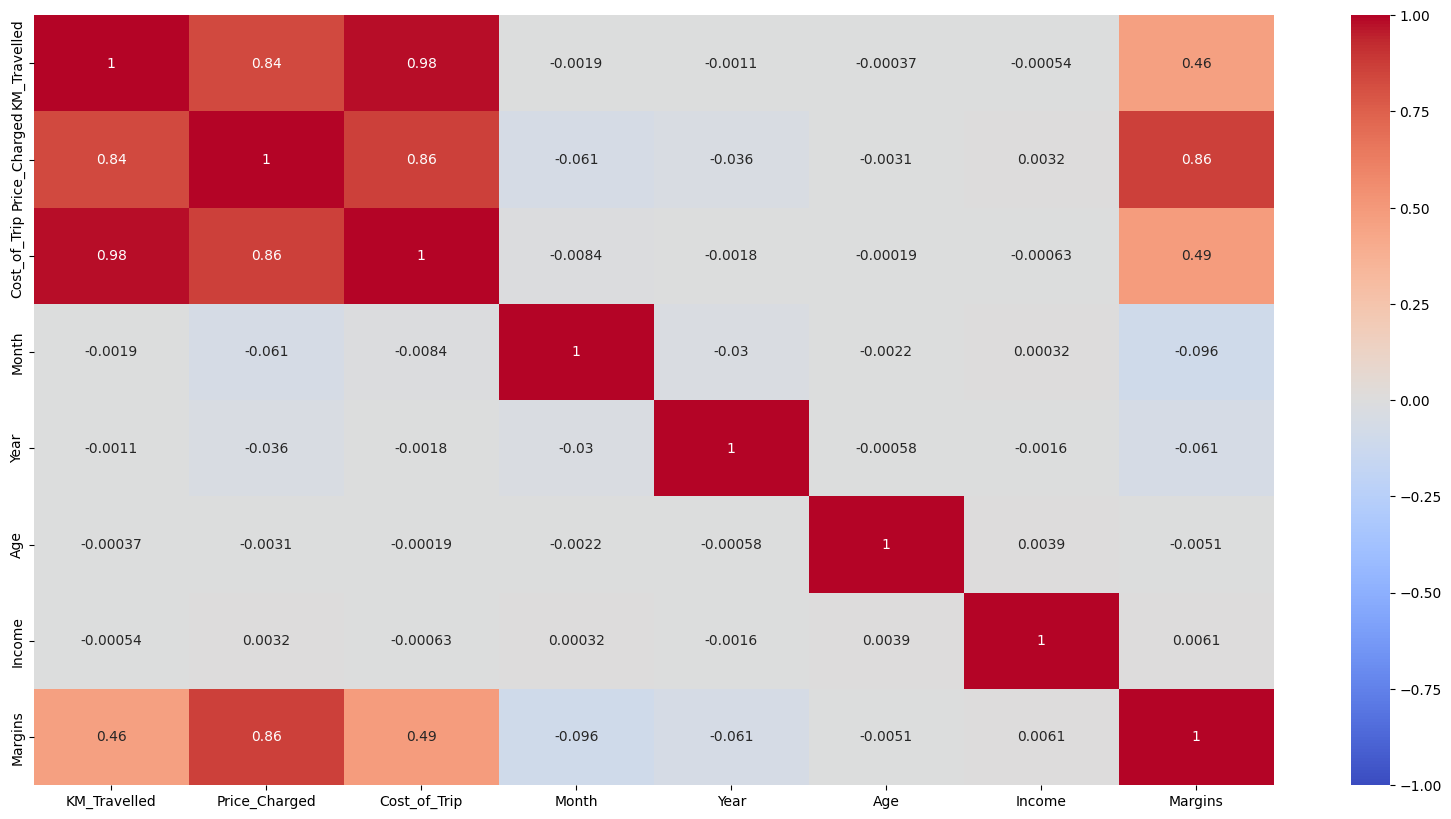

In [87]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

In [88]:
city_m = master_data[master_data.Month==12].groupby('City').Margins.mean()
city_m

City
ATLANTA GA         95.844236
AUSTIN TX          90.535487
BOSTON MA          61.158200
CHICAGO IL         49.166594
DALLAS TX         107.653009
DENVER CO         111.229893
LOS ANGELES CA     78.671170
MIAMI FL           98.341176
NASHVILLE TN       78.562585
NEW YORK NY       256.663241
ORANGE COUNTY      71.696141
PHOENIX AZ         72.779471
PITTSBURGH PA      50.946547
SACRAMENTO CA      23.995713
SAN DIEGO CA       67.587428
SEATTLE WA         75.043692
SILICON VALLEY    161.907324
TUCSON AZ          83.594826
WASHINGTON DC      60.778328
Name: Margins, dtype: float64

In [89]:
dt1 = master_data[(master_data.Company=='Pink Cab')&(master_data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dt2 = master_data[(master_data.Company=='Yellow Cab')&(master_data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dd1 = pd.DataFrame({'Margins_pink':dt1.values,'Transactions_pink':master_data[master_data.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_id.count().values})
dd2 = pd.DataFrame({'Margins_yellow':dt2.values,'Transactions_yellow':master_data[master_data.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_id.count().values})

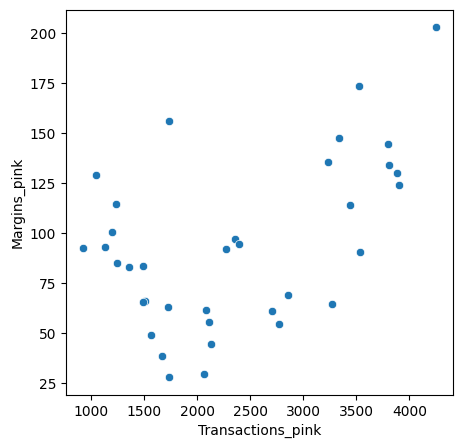

In [90]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd1.Transactions_pink,y=dd1.Margins_pink)
plt.show()

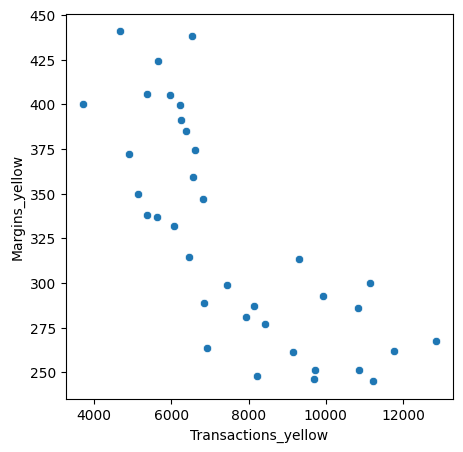

In [91]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd2.Transactions_yellow,y=dd2.Margins_yellow)
plt.show()

# Hypothesis Testing

# Null Hypothesis:Margin remain the same regarding Gender for both Yellow Cab & Pink Cab

In [92]:
a = master_data[(master_data.Gender=='Female')&(master_data.Company=='Yellow Cab')].groupby('Transaction_id').Margins.mean()
b = master_data[(master_data.Gender=='Male')&(master_data.Company=='Yellow Cab')].groupby('Transaction_id').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

116000 158681
We accept alternate hypothesis that there is a statistical difference
P value is  6.060473042494056e-25


In [93]:
a = master_data[(master_data.Gender=='Female')&(master_data.Company=='Pink Cab')].groupby('Transaction_id').Margins.mean()
b = master_data[(master_data.Gender=='Male')&(master_data.Company=='Pink Cab')].groupby('Transaction_id').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

37480 47231
We accept null hypothesis that there is no difference
P value is  0.11515305900425798


In [94]:
#Margins per Age
master_data[master_data.Age<=50].groupby('Company').Margins.mean()
master_data[master_data.Age>50].groupby('Company').Margins.mean()

Company
Pink Cab       62.053044
Yellow Cab    155.855885
Name: Margins, dtype: float64

In [95]:
#Pink Cab
a = master_data[(master_data.Age<=50)&(master_data.Company=='Pink Cab')].groupby('Transaction_id').Margins.mean()
b = master_data[(master_data.Age>50)&(master_data.Company=='Pink Cab')].groupby('Transaction_id').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

71228 13483
We accept null hypothesis that theres no difference
P value is  0.32817487547980695


In [96]:
#Yellow Cab
a = master_data[(master_data.Age<=50)&(master_data.Company=='Yellow Cab')].groupby('Transaction_id').Margins.mean()
b = master_data[(master_data.Age>50)&(master_data.Company=='Yellow Cab')].groupby('Transaction_id').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis')
    
print('P value is ', p_value)

231480 43201
We accept alternate hypothesis that theres a difference
P value is  6.4942568177993685e-09


In [97]:
#Pink Cab
a = master_data[(master_data.Payment_Mode=='Cash')&(master_data.Company=='Pink Cab')].groupby('Transaction_id').Margins.mean()
b = master_data[(master_data.Payment_Mode=='Card')&(master_data.Company=='Pink Cab')].groupby('Transaction_id').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

We accept null hypothesis that theres no difference
P value is  0.7900465828793286


In [98]:
#Yellow Cab
a = master_data[(master_data.Payment_Mode=='Cash')&(master_data.Company=='Yellow Cab')].groupby('Transaction_id').Margins.mean()
b = master_data[(master_data.Payment_Mode=='Card')&(master_data.Company=='Yellow Cab')].groupby('Transaction_id').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no statistical difference
P value is  0.2933060638298729


In [99]:
master_data.head()

level_0  index  Transaction_id     Company        City  KM_Travelled  \
0        0      0        10000011    Pink Cab  ATLANTA GA         30.45   
1        1      1        10351127  Yellow Cab  ATLANTA GA         26.19   
2        2      2        10412921  Yellow Cab  ATLANTA GA         42.55   
3        3      3        10000012    Pink Cab  ATLANTA GA         28.62   
4        4      4        10320494  Yellow Cab  ATLANTA GA         36.38   

   Price_Charged  Cost_of_Trip  Customer_ID Payment_Mode Gender  Age  Income  \
0         370.95      313.6350        29290         Card   Male   28   10813   
1         598.70      317.4228        29290         Cash   Male   28   10813   
2         792.05      597.4020        29290         Card   Male   28   10813   
3         358.52      334.8540        27703         Card   Male   27    9237   
4         721.10      467.1192        27703         Card   Male   27    9237   

  Population     Users  Month  Year   Margins  
0   814,885    24,701       1  2016   57.3150  
1   814,885    24,701       7  2018  281.2772  
2   814,885    24,701      11  2018  194.6480  
3   814,885    24,701       1  2016   23.6660  
4   814,885    24,701       4  2018  253.9808

In [100]:
master_data.to_csv('master_data.csv',index = False)